In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import praw

user_agent = "Scraper 1.0"
reddit = praw.Reddit(
    client_id = "gscPTd0wywq_IjgqoL1Smg",
    client_secret = "UAeWcM7eWeVXQVRJLZehtFq655Dzmw",
    user_agent = user_agent
)

In [3]:
headlines = set()
for submission in reddit.subreddit('politics').hot(limit = None):
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break
    headlines.add(submission.title)
print(len(headlines))

738


In [4]:
df = pd.DataFrame(headlines)
df.head()

,0
0,"In ‘chilling’ new interview, Trump says he’d ‘..."
1,Schiff says 14th Amendment disqualification ‘f...
2,GOP senators weigh ‘special’ meeting on their ...
3,White House asks Congress to pass short-term s...
4,Republican threatens to ‘defund’ NC tribe on b...


In [5]:
df.to_csv('headlines.csv', header = False, encoding = 'utf-8', index = False)

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Albert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width = 100 )

[{'compound': -0.4939,
  'headline': 'In ‘chilling’ new interview, Trump says he’d ‘lock up’ his political enemies if '
              're-elected',
  'neg': 0.198,
  'neu': 0.802,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Schiff says 14th Amendment disqualification ‘fits Donald Trump to a T’',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0516,
  'headline': 'GOP senators weigh ‘special’ meeting on their leadership after McConnell’s freeze',
  'neg': 0.0,
  'neu': 0.893,
  'pos': 0.107}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.198,0.802,0.000,-0.4939,"In ‘chilling’ new interview, Trump says he’d ‘..."
1,0.000,1.000,0.000,0.0000,Schiff says 14th Amendment disqualification ‘f...
2,0.000,0.893,0.107,0.0516,GOP senators weigh ‘special’ meeting on their ...
3,0.000,0.803,0.197,0.4019,White House asks Congress to pass short-term s...
4,0.191,0.809,0.000,-0.3818,Republican threatens to ‘defund’ NC tribe on b...


In [9]:
df['label'] = 0 
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
#df.loc[0.2 < df['compound'] < 0.2, 'label'] = 0
df.head()



,neg,neu,pos,compound,headline,label
0,0.198,0.802,0.000,-0.4939,"In ‘chilling’ new interview, Trump says he’d ‘...",-1
1,0.000,1.000,0.000,0.0000,Schiff says 14th Amendment disqualification ‘f...,-1
2,0.000,0.893,0.107,0.0516,GOP senators weigh ‘special’ meeting on their ...,-1
3,0.000,0.803,0.197,0.4019,White House asks Congress to pass short-term s...,1
4,0.191,0.809,0.000,-0.3818,Republican threatens to ‘defund’ NC tribe on b...,-1


In [10]:
df2 = df[['headline', 'label']]

In [11]:
df2.to_csv('reddit_headline_labels.csv', encoding = 'utf-8', index = False)

In [12]:
df.label.value_counts()

label
-1    581
 1    157
Name: count, dtype: int64

In [13]:
df.label.value_counts(normalize = True) * 100

label
-1    78.726287
 1    21.273713
Name: proportion, dtype: float64

In [14]:
print("Positive headlines: \n")
pprint(list(df[df['label'] == 1].headline)[:5], width = 200)

print("\nNegative headlines: \n")
pprint(list(df[df['label'] == -1].headline)[:5], width = 200)

Positive headlines: 

['White House asks Congress to pass short-term spending deal, boost food aid',
 "Education advocates seek to repeal Nebraska's school choice law, while supporters say bill is win for everyone",
 'Trump Defenses of Georgia Phone Call Are Strong Arguments Against Trump 2024 Campaign - “We’re delusional, we’re unfathomably poorly informed, and we’d like to be put back in charge of the United '
 'States”',
 'Vivek Ramaswamy thinks college applications should include a 1-mile run and other parts of the Presidential Fitness Test',
 "'I won't survive': Growing up with a Mom for Liberty parent, a group that's suddenly one of the most influential forces in U.S. schools"]

Negative headlines: 

['In ‘chilling’ new interview, Trump says he’d ‘lock up’ his political enemies if re-elected',
 'Schiff says 14th Amendment disqualification ‘fits Donald Trump to a T’',
 'GOP senators weigh ‘special’ meeting on their leadership after McConnell’s freeze',
 'Republican threatens to ‘d

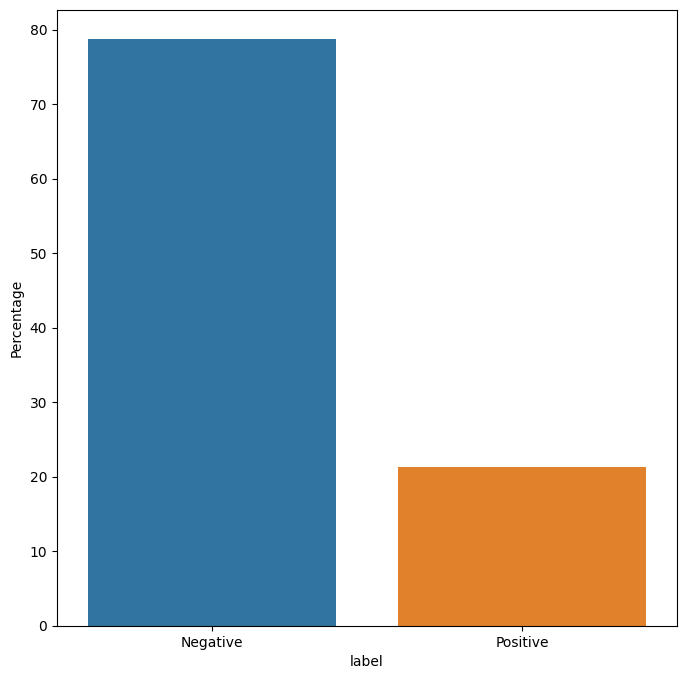

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))
counts = df.label.value_counts(normalize = True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(["Negative", "Positive"])
ax.set_ylabel("Percentage")
plt.show()